### Model Training

#### 1.1 Import Data and Required packages

IMPORTING PANDAS, NUMPY, MATPLOTLIB, SEABORN, SCIKIT LEARN AND WARNING LIBRARIES.

In [1]:
# Basic Import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the csv Data as Pandas DataFrame

In [2]:
df =pd.read_csv('StudentsPerformance.csv')

In [3]:
# Top 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y

In [4]:
# Creating X 
X = df.drop(columns=['math score'],axis = 1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
# Creating y
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [6]:
### Transforming Categorical Features into Numerical Features
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [7]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Creating an Evaluate Function to give all metrics after model Training

In [9]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse =np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, mse, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoosting Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)       # Fitting the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and test dataset
    model_train_mae, model_train_rmse, model_train_r2, _ = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2, _ = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------------------------')


    print('Model performance for test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 5.3231
-------------------------------------------
Model performance for test set
- Root Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 5.3940


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 6.5938
-------------------------------------------
Model performance for test set
- Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 6.5197


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 5.3233
-------------------------------------------
Model performance for test set
- Root Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- R2 Score: 5.3904


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 32.5776
- Mean Absolute Error: 4.5167
- R2 Sco

In [11]:
# Make the Output into DataFrame
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
4,Decision Tree,8.034301
3,K-Neighbors Regressor,7.253041
1,Lasso,6.519695
6,XGBoosting Regressor,6.473307
8,AdaBoost Regressor,6.051337
5,Random Forest Regressor,6.019856
7,CatBoosting Regressor,6.008632
0,Linear Regression,5.393994
2,Ridge,5.390387


#### Decision Tree 

In [12]:
decision_tree_model =  DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 75.54


### Plot y_pred and y_test

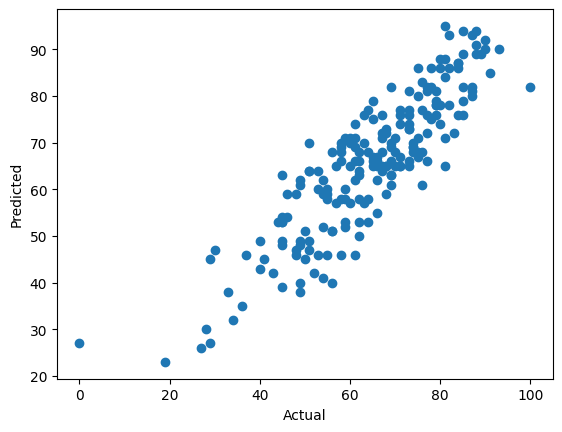

In [13]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

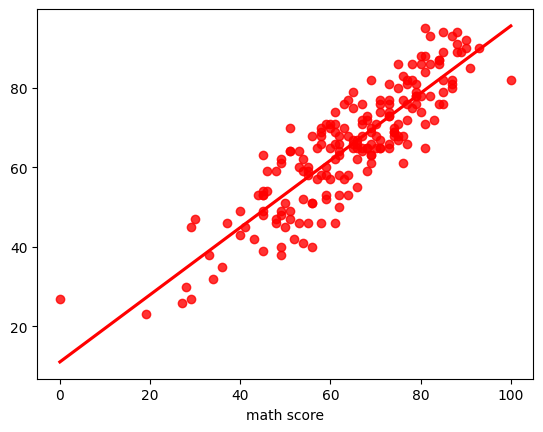

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');
plt.show()

#### Difference between Actual and Predicted Values

In [15]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred,'Difference':y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,85.0,6.0
737,53,60.0,-7.0
740,80,74.0,6.0
660,74,69.0,5.0
411,84,76.0,8.0
...,...,...,...
408,52,42.0,10.0
332,62,64.0,-2.0
208,74,70.0,4.0
613,65,66.0,-1.0
